In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [13]:
data=pd.read_csv('/content/Mall_Customers.csv')

In [14]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
data.rename(columns={'Genre':'Gender'}, inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
df=data.iloc[:,[3,4]]
df.columns=["Annual Income", "Spending Score"]
print(df.shape)
df.head()

(200, 2)


,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [20]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df[["Annual Income", "Spending Score"]])
scaled_data

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

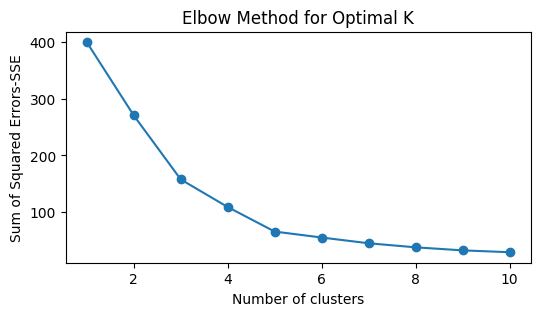

In [21]:
sse=[]
k_range=range(1,11)

for k in k_range:
  kmeans=KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_data)
  sse.append(kmeans.inertia_)

plt.figure(figsize=(6,3))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors-SSE')
plt.title('Elbow Method for Optimal K')
plt.show()


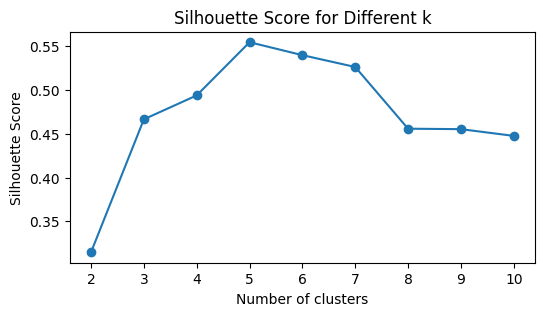

In [24]:
silhouette_scores = []
for k in range(2,11):
  kmeans=KMeans(n_clusters=k, random_state=42)
  labels=kmeans.fit_predict(scaled_data)
  silhouette_scores.append(silhouette_score(scaled_data, labels))

plt.figure(figsize=(6,3))
plt.plot(range(2,11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.show()

In [25]:
optimal_k=5

kmeans=KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster']=kmeans.fit_predict(scaled_data)

cluster_centers=scaler.inverse_transform(kmeans.cluster_centers_)
print('Cluster Centers:', cluster_centers)

Cluster Centers: [[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


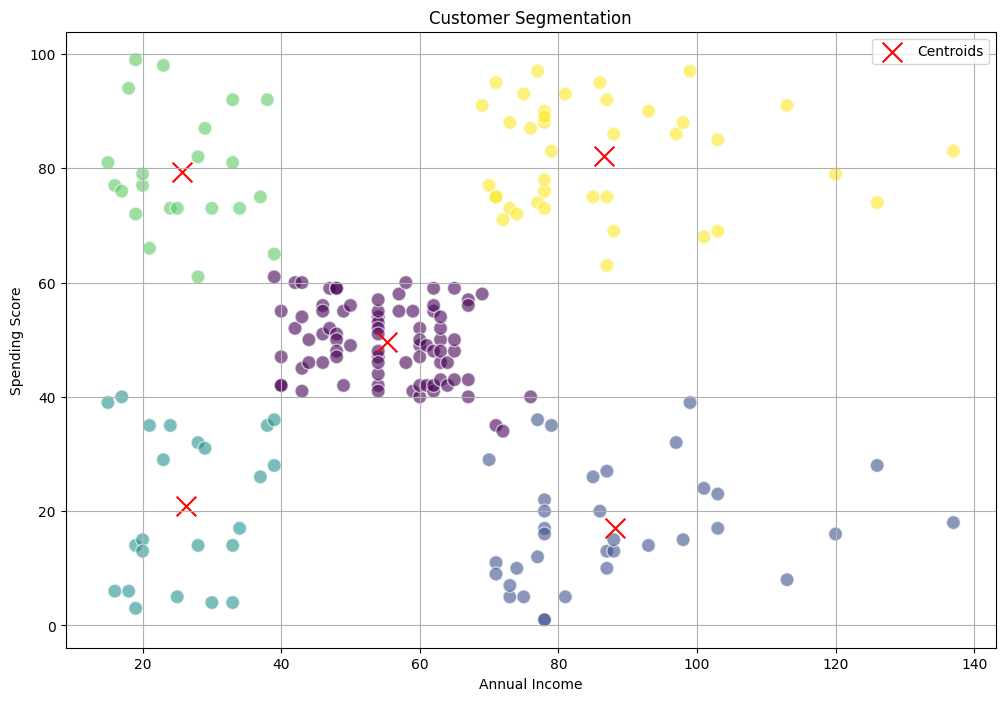

In [28]:
plt.figure(figsize=(12,8))

plt.scatter(df['Annual Income'], df['Spending Score'],c=df['Cluster'],cmap='viridis', marker='o',s=100,alpha=0.6,edgecolors='w')

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c='red', marker='x', s=200, label='Centroids')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.legend()
plt.grid(True)
plt.show()